# 1. 사이킷런 소개와 머신러닝 분류 예측 모델 개요
* 사이킷런 소개
 * 사이킷런은 쉽고 가장 파이썬스러운 API를 제공
 * 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공
 * 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 라이브러리
 * 주로 Numpy, Scipy 기반 위에서 구축된 라이브러리<br><br>
* 사이킷런을 이용한 붓꽃 데이터 분류
 * 붓꽃 데이터 피처 : 꽃받침 너비, 길이 / 꽃잎의 너비, 길이
 * 붓꽃 데이터 품종(레이블) : Setosa, Versicolor, Virginica<br><br>
* 머신러닝을 위한 용어 정리
 * 피처(Feature), 속성 : 피처는 데이터 세트의 일반 속성. 머신러닝은 2차원 이상의 다차원 데이터에서도 많이 사용되므로 타겟값을 제외한 나머지 속성을 모두 피처로 지칭
 * 레이블, 클래스, 타겟(값), 결정(값) : 타겟값 또는 결정값은 지도 학습 시 데이터의 학습을 위해 주어지는 정답 데이터. 지도 학습 중 분류의 경우에는 이 결정값을 레이블 또는 클래스로 지칭<br><br>
* 지도학습 - 분류
 * 분류는 대표적인 지도학습의 방법 중 하나
 * 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측
 * 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
 * 이 때 학습을 위해 주어진 데이터 세트를 `학습 데이터 세트`, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 `테스트 데이터 세트`로 지칭<br><br>
* 붓꽃 데이터 분류 예측 프로세스
 * 1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
 * 2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
 * 3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
 * 4. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가

# 2. 첫 번째 머신러닝 모델 만들어 보기 - 붓꽃 품종 예측하기

* 사이킷런 버전 확인

In [3]:
import sklearn
print(sklearn.__version__)

1.0.2


* 붓꽃 예측을 위한 사이킷런 필요 모듈 로딩

In [5]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

* 데이터 세트를 로딩

In [6]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()
print(iris, '\n') # 딕셔너리와 유사한 형태를 가짐

# iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target 값:', iris_label, '\n')
print('iris target 명', iris.target_names, '\n')

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* 학습 데이터와 테스트 데이터 세트로 분리
 * test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율
 * random_state : 호출할 때마다 같은 학습/테스트용 데이터세트를 생성하기 위해 주어지는 난수 발생 값

In [9]:
# 관습적으로 대문자를 쓰면 피쳐, 소문자를 쓰면 타켓
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, # 피처 데이터세트, 타겟 데이터 세트
                                                    test_size = 0.2, random_state = 11)

* 학습 데이터 세트로 학습(Train) 수행

In [12]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

* 테스트 데이터 세트로 예측(Predict) 수행

In [14]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

* 예측 정확도 평가
 * accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)

In [16]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# 3. 사이킷런의 기반 프레임 워크 익히기 - 주요 API/모듈 및 내장 예제 데이터 세트 소개

* 사이킷런 기반 프레임 워크 - Estimator와 fit(), predict()
 * 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭
 * 이들 Classifier, Regressor을 합쳐서 Estimator 클래스라고 부름
 * 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름
 * 지도학습에서 fit()은 학습을 의미했다면, 비지도학습에서의 fit()는 데이터를 변환하기 위한 사전 구조를 맞추는 작업<br>
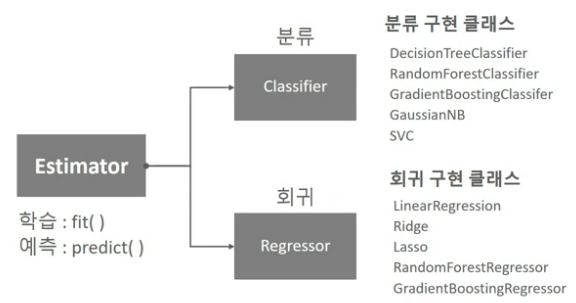<br><br>

* 사이킷런의 주요 모듈<br>
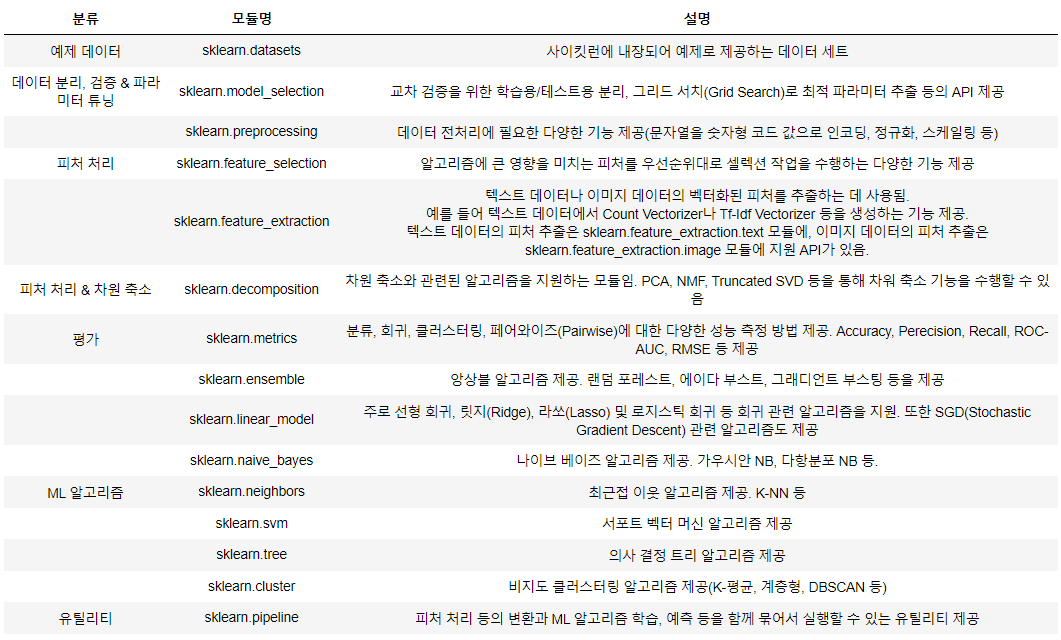<br>

* 사이킷런 내장 예제 데이터셋 - 분류 및 회귀용<br>
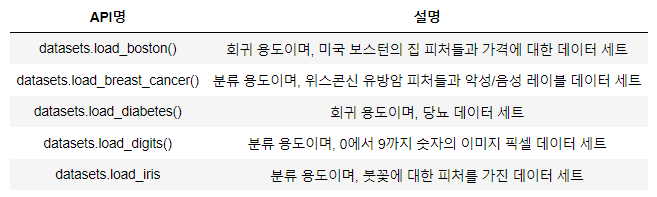
<br><br>

* 내장 예제 데이터 셋 구성<br>
딕셔너리 형태로 되어있음을 유념하기<br>
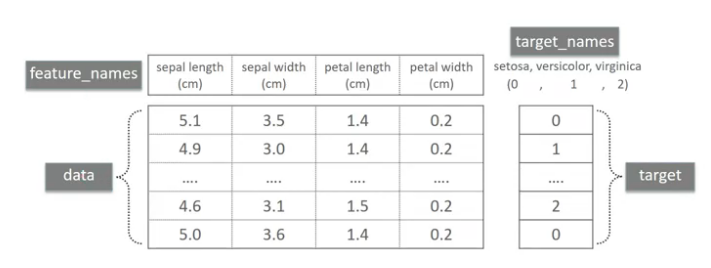<br>

* 사이킷런 내장 예제 데이터

In [7]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data)) # Bunch라는 class type. 파이썬의 딕셔너리 타입과 비슷

<class 'sklearn.utils.Bunch'>


In [8]:
keys = iris_data.keys() # 딕셔너리 형태이므로 key() 값을 확인
print('붓꽃 데이터 세트의 키들 :', keys)

붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


키는 보통 data, target, target_names, feature_names, DESCR로 구성되어 있다. 개별 키가 가리키는 의미는 아래와 같다.<br>
* data : 피처의 데이터 세트
* target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
* target_names : 개별 레이블의 이름<br> => ndarray이기 때문에 name을 가지고 있지 않아 별도의 데이터로 생성    
* feature_names : 피처의 이름<br> => ndarray이기 때문에 name을 가지고 있지 않아 별도의 데이터로 생성    
* DESCR : 데이터 세트에 대한 설명과 각 피처의 설명

In [10]:
# load_iris()가 반환하는 객체의 주요 키가 가리키는 값
print('\n feature names의 type :', type(iris_data.feature_names))
print(' feature_names의 shape :', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target names의 type :', type(iris_data.target_names))
print(' feature_names의 shape :', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type :', type(iris_data.data))
print(' data의 shape :', iris.data.shape)
print(iris_data['data'])

print('\n target의 type :', type(iris_data.target))
print(' target의 shape :', iris_data.target.shape)
print(iris_data.target)


 feature names의 type : <class 'list'>
 feature_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target names의 type : <class 'numpy.ndarray'>
 feature_names의 shape : 3
['setosa' 'versicolor' 'virginica']

 data의 type : <class 'numpy.ndarray'>
 data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

# 4. Model Selection 모듈 소개

* 학습/테스트 데이터 세트 분리 - train_test_split()
 * 학습 데이터 세트
   * 머신러닝 알고리즘의 학습을 위해 사용
   * 데이터의 속성들과 결정값(레이블) 모두를 가지고 있음
   * 학습 데이터를 기반으로 머신러닝 알고리즘이 데이터 속성과 결정값의 패턴을 인지하고 학습
 * 테스트 데이터 세트
   * 테스트 데이터 세트에서 학습된 머신러닝 알고리즘을 테스트
   * 테스트 데이터는 속성 데이터만 머신러닝 알고리즘에 제공하며, 머신러닝 알고리즘은 제공된 데이터를 기반으로 결정값을 예측
   * 테스트 데이터는 학습 데이터와 별도의 데이터 세트로 제공되어야 함.
 * sklearn.model_selction의 train_test_split() 함수
   * X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state = 121)
   * test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. 디폴트는 0.25
   * train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. test_size parameter를 통상적으로 사용하기 때문에 잘 사용하지 않음
   * shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정. 디폴트는 True. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
   * random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. train_test_split()는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트용 데이터를 생성
   * train_test_split()의 반환값은 튜플 형태. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환

In [29]:
# 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하는 것의 문제점

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도 :', accuracy_score(train_label, pred))

# 학습도 예측도 모두 train_data로 해버렸기 때문에 예측 정확도가 1.0

예측 정확도 : 1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.3, random_state = 121)

In [35]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 :{0:0.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 :0.9556


넘파이 ndarray 뿐만 아니라 판다스 DataFrame/Series도 train_test_split()으로 분할 가능<br>
사이킷런 API 중에서 디폴트는 ndarray이지만, DataFrame도 인자로 넣으면 거기에 맞춰서 변환을 해주는 것도 있음 

In [37]:
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
ftr_df = iris_df.iloc[:, :-1]
tgt_df = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(ftr_df, tgt_df,
                                                    test_size = 0.3, random_state = 121)

In [42]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [44]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:0.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


* 교차 검증
 * 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김
 * 결국 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하
 * 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행<br>
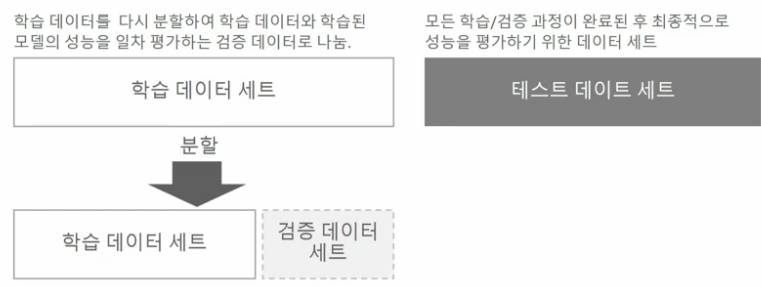<br>

* K 폴드 교차 검증
 * K 폴드 교차 검증은 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
 * 즉, K개의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영
 * 사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공<br>
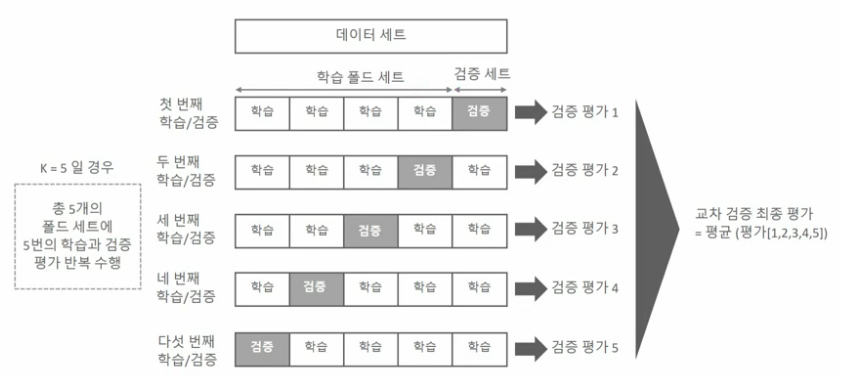<br>

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 :', features.shape[0])

붓꽃 데이터 세트 크기 : 150


In [12]:
n_iter = 0

# KFold 객체의 split() 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
# split() 함수는 피처 데이터는 필수이고, 레이블 데이터는 선택적으로 포함
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
          
    cv_accuracy.append(accuracy)
          
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


* Stratified K 폴드
 * 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
 * 불균형한 분포도 : 예를 들어 대출 사기 데이터를 예측할 때, 총 20,000개의 학습 데이터 중 19,900개는 사기가 아니며, 100개는 사기이다. 이 때 무조건적으로 K 폴드 교차 검증을 한다면 불균형한 데이터 분포를 가질 수 있음
 * 학습데이터와 검증데이터 세트가 가지는 레이블 분포도가 유사하도록 검증 데이터 추출
 * 즉, K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결
 * 따라서, 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할되어야 함
 * 회귀(Regression)에서는 당연히 Stratified K 폴드가 지원되지 않음

In [56]:
# 붓꽃 데이터 세트의 레이블 분포도 확인
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [59]:
# 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인

kfold = KFold(n_splits = 3)

# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트용 데이터 로우 인덱스 번호 반환
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())
    print('\n')
    
# 단순 k-fold 교차검증을 사용하면 안되겠다 !

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64


## 교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64


## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64




In [15]:
# 따라서, StratifiedKFold를 이용해서 레이블 분포도를 확인해보자 !
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']): # 앞의 k-fold와 다르게 y 값이 반드시 들어가야 함. 레이블 값이 무엇인지 알아야 쪼갤 수 있기 때문 
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())
    print('\n')

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: label, dtype: int64


## 교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: label, dtype: int64


## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: label, dtype: int64




In [16]:
# StratifiedKFold 방식으로 레이블 분포도가 적절하게 잘 분배됨
# 따라서, StratifiedKFold 방식으로 교차 검증을 수행해보자 !

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 :', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 :[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 :[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도 : 0.9667


* 교차 검증을 보다 간편하게 - cross_val_score()<br>
 * cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
 * estimator : 사이킷런 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor을 의미
 * X : 피처 데이터 세트
 * y : 레이블 데이터 세트
 * scoring : 예측 성능 평가 지표
 * cv : 교차 검증 폴드 수
 * cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
 * cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블 값에 따라 학습/테스트 세트를 분할
 * 물론, 회귀인 경우 Stratified KFold 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할<br>
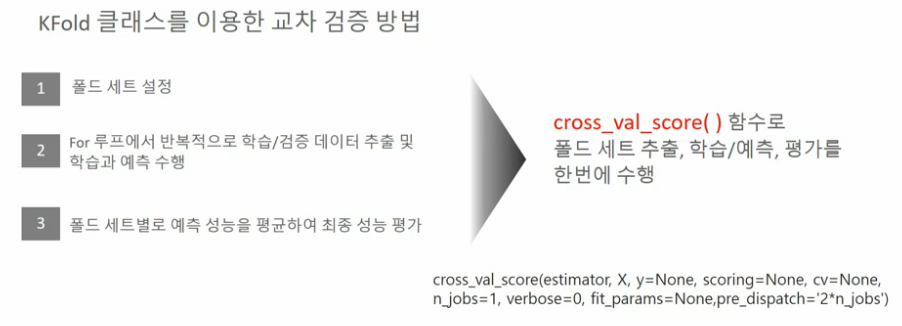<br><br>

* cross_validate()
 * cross_val_score()는 단 하나의 평가 지표만 가능하지만 cross_validate()는 여러 개의 평가 지표를 반환 가능
 * 또한, 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
# cross_val_score는 당연히 StratifiedKFold를 이용 (물론 분류의 경우에만 ! 회귀는 KFold)
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)

print(scores, type(scores))
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

[0.98 0.94 0.98] <class 'numpy.ndarray'>
교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


* GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
 * 하이퍼 파라미터 : 모델 알고리즘에 최적 튜닝을 할 수 있는 파라미터
 * 사이킷런은 GridSearchCV를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공 (Grid는 격자라는 뜻으로, 촘촘하게 파라미터를 입력하면서 테스트하는 방식)
 * GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념<br><br>
 * DecisionTreeClassifier에서 2개의 파라미터를 고려
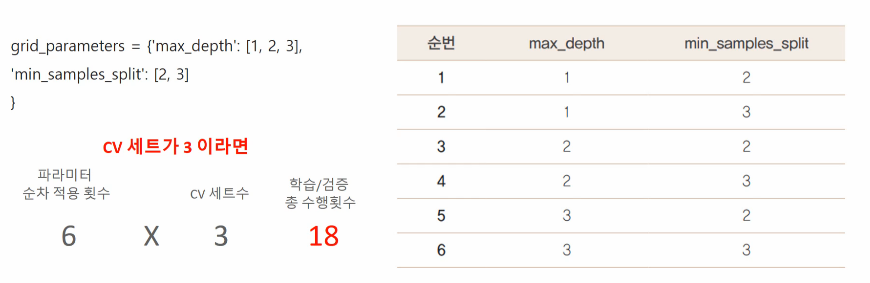<br>
 * 즉, 18번 학습/검증을 수행하면서 최적의 파라미터를 도출함<br><br>
 
 * GridSearchCV 클래스의 주요 파라미터
   * estimator : classifier, regressor, pipeline이 사용될 수 있음
   * param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
   * scoring : 예측 성능을 측정할 평가 방법을 지정함. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있음
   * cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정
   * refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 121)

dtree = DecisionTreeClassifier()

# parameter들을 dictionary 형태로 설정
# 만약 파라미터를 하나만 설정하고 싶어도 반드시 리스트 형태로 넣어야 함을 주의
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

* params 칼럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터값을 나타냄
* rank_test_score는 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타냄 (1이 가장 뛰어난 순위이며 이 때의 파라미터가 최적의 하이퍼 파라미터)
* mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값

In [19]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정
# refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴
# 이 옵션을 적용하면 나중에 best_estimator_에서 최적의 파라미터를 가지게 됨
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True, return_train_score = True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_라는 딕셔너리로 저장됨. 이를 DataFrame으로 반환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
# 주요 칼럼만 발췌해서 GridSearchCV의 동작을 확인
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [20]:
grid_dtree.cv_results_ # 보기 어려워서 위에서 데이터프레임으로 바꾼 것 !

{'mean_fit_time': array([0.00099738, 0.00166106, 0.00133721, 0.00111715, 0.00133133,
        0.00066662]),
 'std_fit_time': array([0.00081478, 0.00047609, 0.00046757, 0.00016949, 0.00046834,
        0.00047137]),
 'mean_score_time': array([0.00066479, 0.00133451, 0.00033108, 0.00042462, 0.00023945,
        0.00033236]),
 'std_score_time': array([0.00047008, 0.00046744, 0.00046822, 0.00030028, 0.00033864,
        0.00047002]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [21]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

# refit = True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750
테스트 데이터 세트 정확도 : 0.9667


In [23]:
# 아래를 실행하면 당연히 위의 결과와 같음. 왜냐하면 최적 파라미터로 이미 refit이 되어 있기 때문 !

# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 :{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 :0.9667


# 5. 데이터 전처리

* 데이터 인코딩<br>
머신러닝 알고리즘은 문자열 데이터 속성을 입력 받지 않으며 모든 데이터는 숫자형으로 표현되어야 한다. 문자형 카테고리형 속성은 모두 숫자값으로 변환/인코딩 되어야 한다.
 * 레이블(Label) 인코딩
 * 원-핫(One-Hot) 인코딩


* 레이블 인코딩<br>
 * 카테고리 피처를 코드형 숫자 값으로 변환하는 것
 * LabelEncoder 클래스로 구현
 * fit()과 transform()을 이용하여 변환
 * 숫자값 사이의 차이가 발생할 수 있다는 점을 주의해야 함<br>
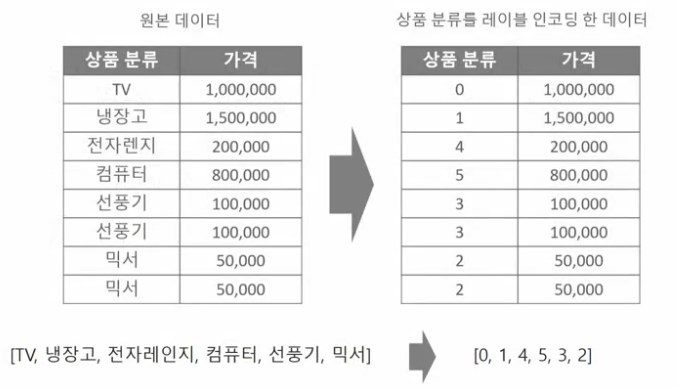

In [10]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items) # 고유값이 몇 개 있는지 확인해주는 용도
labels = encoder.transform(items)
# labels = encoder.fit_transform(items)로 fit()과 transform()을 한 번에 수행도 가능
print('인코딩 변환값 :', labels) # 반환값은 ndarray

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [3]:
# 데이터가 많은 경우 어떤 숫자값으로 인코딩됐는지 직관적으로 알 수 없음
# 따라서, LabelEncoder 객체의 classes_ 속성값으로 확인
# classes_ 속성은 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가짐
print('인코딩 클래스 :', encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [4]:
# inverse_transform()을 통해 인코딩된 값을 다시 디코딩 가능
print('디코딩 원본 값 :', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값 : ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 원-핫 인코딩<br>
 * 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식
 * OneHotEncoder 클래스로 변환이 가능
 * OneHotEncoder를 사용할 때 주의할 점
   * 입력값으로 2차원 데이터가 필요
   * OneHotEncoder를 이용해 변환한 겂이 희소 행렬(Sparse Matrix) 형태이므로 이를 다시 toarray() 메서드를 이용해 밀집 행렬(Dense Matrix)로 변환
 * 판다스에 원-핫 인코딩을 더 쉽게 지원하는 API : pd.get_dummies(df)을 이용<br>
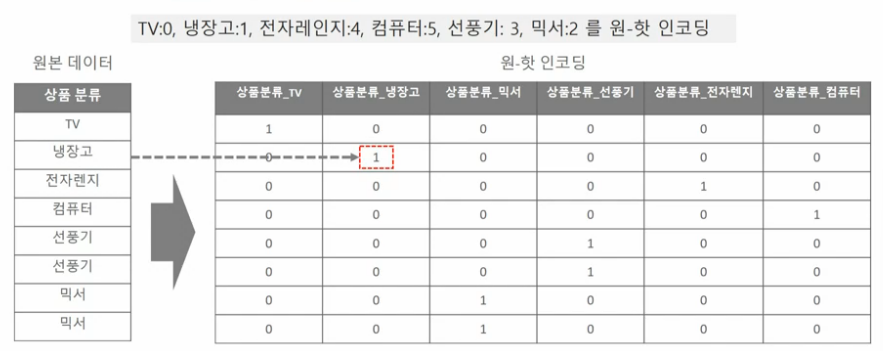

In [24]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 사용하기 위해 무조건 2차원 변환이 필요
# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 Sparse행렬(희소행렬)이므로 이를 Dense 행렬로 변환
print('희소행렬')
print(oh_labels, '\n')
print('원-핫 인코딩 데이터')
print(oh_labels.toarray(), '\n')
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

희소행렬
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0 

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]] 

원-핫 인코딩 데이터 차원
(8, 6)


* 판다스의 get_dummies() 함수를 이용한 원-핫 인코딩

In [12]:
import pandas as pd

df = pd.DataFrame({'items':['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [15]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


___

* 피처 스케일링
 * 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
 * 표준화(Standardization)
 * 정규화(Normalization)

* 표준화
 * 표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 반환하는 것을 의미
 * StandardScaler<br>
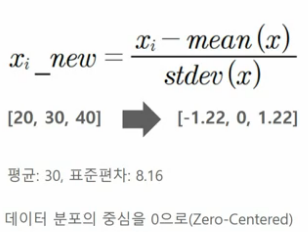

In [19]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터셋을 로딩하고 DataFrame으로 반환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [22]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환. fit()과 transform() 호출
scaler.fit(iris_df) # fit 과정에서 데이터의 평균, 분산 등을 계산
iris_scaled = scaler.transform(iris_df)
# scaler.fit_transform(iris_df)처럼 fit()과 transform()을 한 번에 가능

# transform()시 scale 변환된 데이터셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


* 정규화
 * 정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
 * MinMaxScaler<br>
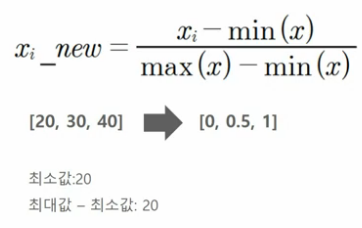

In [24]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터셋 변환. fit()과 transform() 호출
scaler.fit(iris_df) # fit()은 min, max의 값이 무엇인지 계산
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarray로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 최소값')
print(iris_df_scaled.min())
print('feature들의 최대값')
print(iris_df_scaled.max())

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항
 * 학습 데이터와 테스트 데이터의 척도를 같게 해야 한다.
 * 즉, Scaler 객체를 이용해 학습 데이터 세트로 fit(), transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다는 것
 * 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하기 어려움

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상의 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [28]:
# 대표로 MinMaxScaler를 살펴보자 !

# 최솟값 0, 최댓값 1으로 변환하는 MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 :', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [30]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('원본 test_array 데이터 :', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


=> 학습할 때의 변환과 테스트할 때의 변환의 척도의 차이가 남

In [32]:
# 따라서, 테스트 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수항핸 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터 :', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터 :', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()으로 변환해야 함.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터 :', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터 :', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터 : [0 1 2 3 4 5]
Scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


* 따라서, 학습과 테스트 데이터에 fit()과 transform()을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직
* 그것이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측
* 데이터 전처리
 * Null 처리
 * 불필요한 속성 제거
 * 인코딩 수행
* 모델 학습 및 검증/예측/평가
 * 결정트리, 랜덤포레스트, 로지스틱 회귀 학습 비교
 * K 폴드 교차 검증
 * cross_val_score()와 GridSearchCV() 수행

___

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Paasengerid : 탑승자 데이터 일련번호
* [타겟값] Survived : 생존 여부, 0 = 사망, 1 = 생존
* Pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* Name : 탑승자 이름
* Sex : 탑승자 성별
* Age : 탑승자 나이
* Sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
* Parch : 같이 탑승한 부모님 또는 어린이 인원수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 선실 번호
* Embarked : 중간 정착 항구, C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
# 로딩된 데이터 칼럼 타입 확인
print('\n ### train 데이터 정보 ### \n')
print(titanic_df.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [39]:
titanic_df.describe() # titanic_df.describe().transpose() 하면 전치된 형태를 볼 수 있음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Null 컬럼들에 대한 처리

In [42]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


* 문자열 컬럼에 대한 처리

In [31]:
# object 컬럼타입 추출
titanic_df.dtypes[titanic_df.dtypes == 'object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [48]:
# Sex, Cabin, Embarked의 값 분류 살펴보기
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [50]:
# Sex, Embarked 값은 큰 문제가 없으나, Cabin의 경우 N이 687건으로 가장 많고, 속성값이 제대로 정리되지 않음

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 선실 번호가 너무 길어서 첫 글자만 가져옴 
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


* 데이터 탐색

In [33]:
# 1. 성별에 따른 생존률
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

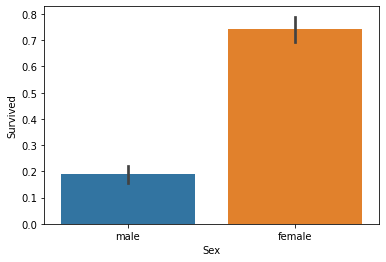

In [57]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

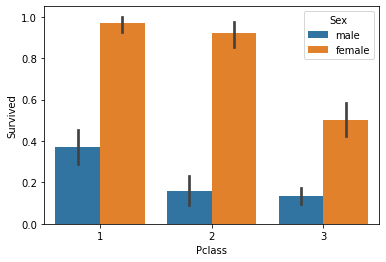

In [59]:
# 2. Pclass에 따른 생존률
# Sex를 카테고리성 칼럼으로 세분화해서 볼 수 있음
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

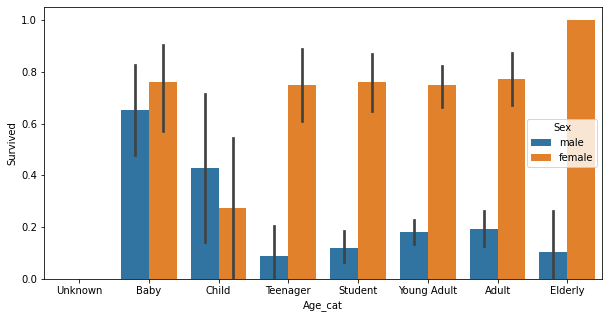

In [62]:
# 3. Age에 따른 생존률
# Age 변수의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 5))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names) # order 옵션에 group_names(나이 순)을 적어주면 그래프가 나이순으로 정렬
titanic_df.drop('Age_cat', axis = 1, inplace = True)

=> 이를 통해 Sex, Age, Pclas 등이 중요하게 생존을 좌우하는 피처임을 확인

* 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
 * 레이블 인코딩 적용

In [64]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [68]:
# 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 함

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [70]:
# 원본 데이터를 재로딩하고, feature 데이터셋과 Label 데이터셋 추출
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

# Data Preprocessing 함수 적용
X_titanic_df = transform_features(X_titanic_df)

* 학습 데이터, 테스트 데이터 분리

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 크래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

# DecisionTreeClassifier 학습 / 예측 / 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:0.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습 / 예측 / 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:0.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습 / 예측 / 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:0.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


=> 결과를 보면 LogisticRegression 모델의 정확도가 높음<br>
=> 하지만, 최적화 작업을 수행하지 않았으므로 교차 검증으로 결정 트리 모델을 조금 더 평가

In [79]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:0.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서 평균 정확도 계싼
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:0.4f}'.format(mean_score))
    
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:0.4f}'.format(iter_count, accuracy))

print('평균 정확도 {0:0.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 0.7879


In [86]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5) # refit 옵션은 디폴트가 True
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_ # 이미 최적 파라미터로 학습이 된 것

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:0.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
